<a href="https://colab.research.google.com/github/jsdysw/dive-into-deep-learning/blob/master/multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils import data
import matplotlib.pyplot as plt
import numpy

# FashionMNIST dataset


In [2]:
# `ToTensor` converts the image data from PIL type to 32-bit floating point
# tensors. It divides all numbers by 255 so that all pixel values are between
# 0 and 1
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [3]:
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=4)
test_iter = data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Defining Model

In [4]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);

# Initializing model parameters

In [5]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

# Train

In [6]:
def accuracy(y_hat, y):  
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [7]:
num_epochs = 10

test_accuracy = []
train_loss = []
train_accuracy = []

for epoch in range(num_epochs):    
    train_loss_sum = 0.0
    train_acc_sum = 0
    train_y_num = 0

    for X, y in train_iter:
    # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        # Using PyTorch in-built optimizer & loss criterion
        trainer.zero_grad()
        l.mean().backward()
        trainer.step()

        train_loss_sum += float(l.sum())
        train_acc_sum += accuracy(y_hat, y)
        train_y_num += y.numel()

    # evaluate train accuracy, loss
    train_loss.append(train_loss_sum / train_y_num)
    train_accuracy.append(train_acc_sum / train_y_num)

    # evaluate test accuracy
    net.eval()  # Set the model to evaluation mode
    test_acc = 0.0
    y_num = 0.0
    with torch.no_grad():
        for X, y in test_iter:
          test_acc += accuracy(net(X), y)
          y_num += y.numel()
    test_accuracy.append(test_acc / y_num)

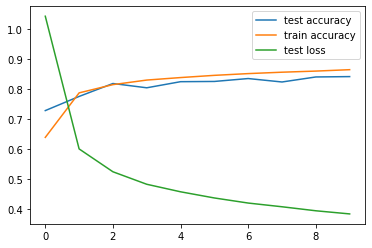

In [8]:
plt.plot(test_accuracy, label='test accuracy')
plt.plot(train_accuracy, label='train accuracy')
plt.plot(train_loss, label='test loss')
plt.legend()

# Prediction

pred tensor(2) true tensor(4)


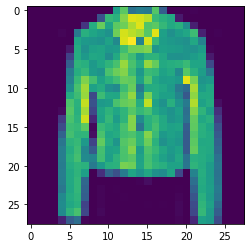

pred tensor(2) true tensor(2)


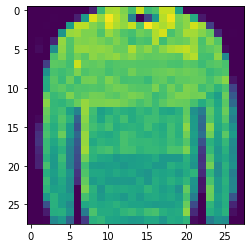

pred tensor(8) true tensor(8)


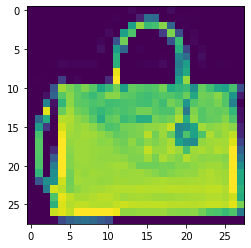

In [10]:
for X, y in test_iter:
    break

prediction = net(X).argmax(axis=1)[10]
trues = y[10]
print("pred", prediction, "true", trues)
plt.imshow(X[10].numpy()[0])
plt.show()

prediction = net(X).argmax(axis=1)[20]
trues = y[20]
print("pred", prediction, "true", trues)
plt.imshow(X[20].numpy()[0])
plt.show()

prediction = net(X).argmax(axis=1)[30]
trues = y[30]
print("pred", prediction, "true", trues)
plt.imshow(X[30].numpy()[0])
plt.show()